In [79]:
import pandas as pd
df = pd.read_csv('data/student_data.csv')

'''
# https://archive.ics.uci.edu/ml/datasets/student+performance
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 paid(추가 유료 수업) - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
4 activities(교과 외 활동) - extra-curricular activities (binary: yes or no)
5 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
6 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
7 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
8 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
9 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
10 health - current health status (numeric: from 1 - very bad to 5 - very good)
11 absences - number of school absences (numeric: from 0 to 93)
12 G1 - first period grade (numeric: from 0 to 20)
13 G2 - second period grade (numeric: from 0 to 20)
14 GRADE - final grade (numeric: from 0 to 20, output target)
'''

"\n# https://archive.ics.uci.edu/ml/datasets/student+performance\n1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)\n2 sex - student's sex (binary: 'F' - female or 'M' - male)\n3 paid(추가 유료 수업) - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)\n4 activities(교과 외 활동) - extra-curricular activities (binary: yes or no)\n5 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)\n6 freetime - free time after school (numeric: from 1 - very low to 5 - very high)\n7 goout - going out with friends (numeric: from 1 - very low to 5 - very high)\n8 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)\n9 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)\n10 health - current health status (numeric: from 1 - very bad to 5 - very good)\n11 absences - number of school absences (numeric: from 0 to 93)\n12 G1 - first period grade (numeric

### 1. 머신러닝
#### 1-1. 시각화 포함 탐색적 자료분석(EDA)
#### 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.
#### 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.
#### 1-4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.
#### 1-5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.
#### 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명. 현업에서 사용시 주의할 점 등에 대해                 기술.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB
ShapiroResult(statistic=0.9871252179145813, pvalue=0.001430215546861291)


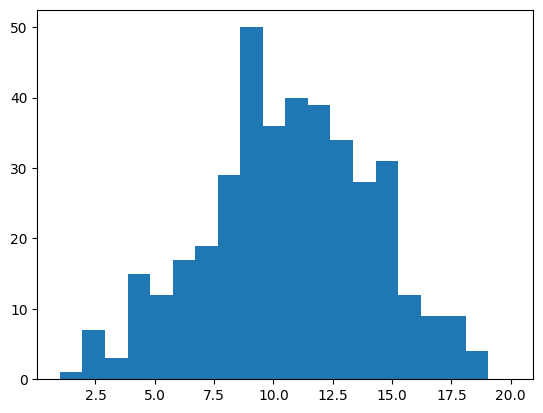

In [80]:
# 1-1. EDA
# 1) 데이터 타입 설명
df.info()
df.head()
# 변수는 총 14개이며, 이중 object 타입은 4개, float64 타입은 7개, int64 타입은 3개이다.
# 종속변수는 grade이고 연속형이며, grade외 나머지 변수들은 예상 독립변수들이다.
# 2) 종속변수 분포 설명
df['grade'].value_counts()
import matplotlib.pyplot as plt
grade_hist = df['grade']
grade_hist.sort_values()
plt.hist(grade_hist, bins = 20, range = [1,20], density = False)
# 히스토그램상 정규분포를 이루는 것으로 보이지만, shapiro 검정을 통해 확실히 해보자.
from scipy.stats import shapiro
print(shapiro(grade_hist))
# shapiro 검정을 해본 결과, 정규분포를 따르지 않는다.

<AxesSubplot:>

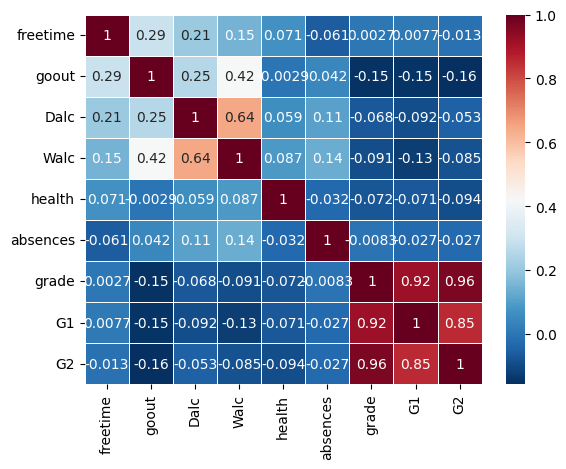

In [81]:
# 3) 독립변수 간 상관관계, 독립변수와 종속변수 간 상관관계
import seaborn as sns
df_temp = df.drop(['school', 'sex', 'paid','activities','famrel'], axis = 1 ).corr(method = 'pearson')
sns.heatmap(df_temp
            , xticklabels=df_temp.columns
            , yticklabels=df_temp.columns
            , cmap = 'RdBu_r'
            , annot = True
            , linewidth = 0.5)
# 연속형 변수들의 pearson 상관관계 결과는 아래와 같다.
# 독립변수 간에는 G1,G2가 0.85이므로 상관성이 매우 높아 보인다. 즉 첫 번째 시험점수와 두 번째 시험점수는 연관성이 높다.
# 독립변수와 종속변수간의 연관성은 Grade와 G1, G2가 0.92, 0.96이므로 확실히 높다.


<BarContainer object of 2 artists>

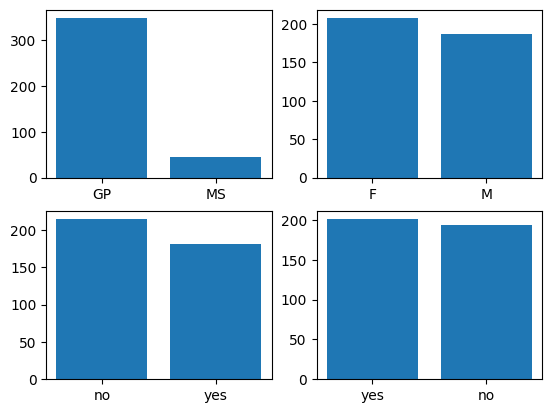

In [82]:
# 4) 범주형 변수 시각화
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2)
axs[0][0].bar(df['school'].value_counts().index, df['school'].value_counts().values)
axs[0][1].bar(df['sex'].value_counts().index, df['sex'].value_counts().values)
axs[1][0].bar(df['paid'].value_counts().index, df['paid'].value_counts().values)
axs[1][1].bar(df['activities'].value_counts().index, df['activities'].value_counts().values)
# 범주형 변수중 school의 경우 불균형이 보인다.

<AxesSubplot:>

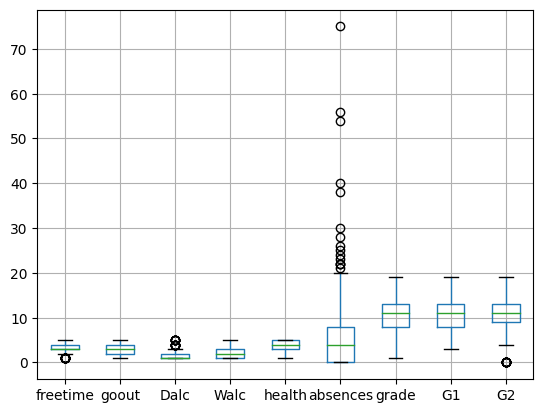

In [53]:
# 5) 이상치 확인
df_temp = df.drop(['school', 'sex', 'paid','activities','famrel'], axis = 1 )
df_temp.boxplot()
# freetime, Dalc, absences, G2 변수내 이상치가 있다.
# svm은 이상치에 민감하기 때문에 추후 scale 변환이 필요할 수 있다.

In [83]:
# 6) 적합 가능한 모델 확인
# 종속변수가 연속형이기 때문에 분류보다는 회귀가 적합하다.

In [84]:
# 1-2. 결측치 식별, 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.
# 1) 결측치 식별
df.info()
df.isnull().sum()
df[df.isnull().any(axis = 1)]
# famrel, freetime, goout, Dalc, Walc, health, absences 변수내 결측치들이 존재한다. 
# 전체 결측치는 19개로 전체 데이터 중 1% 안되는 수치이다.
# 2) 결측치를 식별, 예측하는 방법 2가지 > 여기서 예측은 '대치'이다.
# 결측치를 대치하는 방법중에는 단순대치법과 K-NN을 활용한 대치법이 있다.
# 단순대치법은 연속형인 경우, 각 변수의 평균 혹은 중앙값으로 대치하며, 범주형인 경우 각 변수의 최빈값으로 대치한다.
# K-NN은 최근접 이웃 알고리즘을 통해 결측치를 대치하며, 연속형만 결측치 대치가 가능하다.
# 해당 데이터셋에는 한 행이 모두 결측치인 경우가 없으므로 삭제보다는 대치를 진행하였으며,
# 해당 데이터셋의 결측치는 연속형 변수만 결측치가 존재하므로 K-NN을 사용하였다.
# K-NN은 단순하기 때문에 알고리즘 구현이 쉬우며, 훈련 데이터를 그대로 가지고 있어
# 특별한 훈련을 하지 않기 때문에, 훈련 단계 속도가 매우 빠른 장점을 지닌다.

from sklearn.impute import KNNImputer
df_missing = df[['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences' ]]
ki = KNNImputer(n_neighbors = 5)
ki_fit_transform = ki.fit_transform(df_missing)
df_kit_fit_transform = pd.DataFrame(ki_fit_transform, columns = df_missing.columns)
df[df_missing.columns] = df_kit_fit_transform
df[df.isnull().any(axis = 1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2


In [85]:
# 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.
# 범주형 변수는 'school', 'sex', 'paid', 'activities' 이며, one-hot encoding 변환을 했다.
# one-hot encoding을 진행한 이유는 추후 머신러닝 모델 적합시, 수치형 변수만 적합할 수 있기 때문이다.
# 추가적으로 drop_first = True로 지정하여, 첫 번째 카테고리 값을 사용하지 않았다.
# 나머지는 연속형 변수라고 판단되어 one-hot encoding을 진행하지 않았다.
df = pd.get_dummies(df, columns = ['school', 'sex', 'paid', 'activities' ], drop_first = True)
df

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_MS,sex_M,paid_yes,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6,0,0,0,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5,0,0,0,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8,0,0,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14,0,0,1,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9,1,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16,1,1,0,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8,1,1,0,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12,1,1,0,0


In [87]:
# 1-4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.
# 랜덤분할과 층화추출방법이 있다.
# 랜덤분할은 사용자가 임의로 train, test 데이터로 분할하는 방법이다.
# 층화추출방법은 종속변수 내 클래스 비율에 맞게 train, test 데이터를 분할하는 방법이다. 클래스의 편향을 낮출 수 있으며, 분류분석시 사용한다.
# 해당 데이터셋은 종속변수가 연속형이기 때문에 랜덤분할을 진행하였으며, train, Test데이터로 분할하는 이유는
# 모델 결과가 다른 데이터에도 적용 가능한지, 일반화가 가능한지를 검증하기 위함이다.
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['grade'])
y = df['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2023 )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(276, 13) (276,)
(119, 13) (119,)


In [88]:
# 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.
# 모두 분류/회귀 분석이 가능한 알고리즘이다
# 모두 범주형 변수를 연속형 변수로 변환이 필요하다
# 모두 회귀분석의 다중공선성 문제를 해결할 수 있다.
# SVM은 커널트릭을 통해 xgboost, randomforest는 트리모델을 통해 다중공선성을 해결한다.
# 해당 데이터셋의 종속변수는 연속형이기 때문에 회귀분석을 실시해야 되며, 3가지 알고리즘 모두 적합하다.

In [168]:
# 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명. 현업에서 사용시 주의할 점 등에 대해 기술.
# 1) SVM 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

svr = SVR()
param_grid = {'C' : [0.1,1,10,100], 'gamma' : [0.001, 0.01, 0.1, 1, 10]}
model = GridSearchCV(svr, param_grid, cv = 5) # cv : 교차검증
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# metrics
print('train_score : ', model.score(X_train_scaled, y_train)) # 결정계수값은 0.7 ~ 0.8을 목표치로 설정.
print('test_score : ', model.score(X_test_scaled, y_test))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

# best_hyperparameter
print('best_estimator_ : ', model.best_estimator_)
df_params = pd.DataFrame(model.cv_results_['params'])
df_params['mean_test_score'] = pd.DataFrame(model.cv_results_['mean_test_score'])
df_params.sort_values(by = ['mean_test_score'], ascending = False, inplace = True)
df_params.reset_index(drop = True, inplace = True)
df_params.head()

train_score :  0.964853048430954
test_score :  0.9546611955864519
RMSE :  0.855100390383122
best_estimator_ :  SVR(C=100, gamma=0.001)


,C,gamma,mean_test_score
0,100.0,0.001,0.960918
1,10.0,0.010,0.958672
2,100.0,0.010,0.950790
3,10.0,0.001,0.942825
4,1.0,0.010,0.927746


train_score :  0.9846879427560252
test_score :  0.9714250022111662
RMSE :  0.6788521153752017
best_estimator_ :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
   max_depth  n_estimators  mean_test_score
0          2           100         0.957435
1          2           200         0.955484
2          4           100         0.952499
3          4          

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

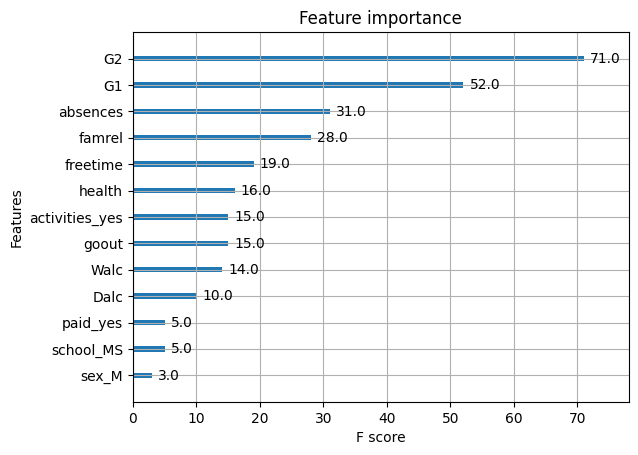

In [169]:
# 2) xgboost
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

xgb = XGBRegressor() # n-estimators = 1000
param_grid = {'n_estimators' : [100,200], 'max_depth' : [2,4]  }
model = GridSearchCV(xgb, param_grid, cv = 5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# metrics
print('train_score : ', model.score(X_train_scaled, y_train))
print('test_score : ', model.score(X_test_scaled, y_test))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

# best_hyperparameter
print('best_estimator_ : ', model.best_estimator_)
df_params = pd.DataFrame(model.cv_results_['params'])
df_params['mean_test_score'] = pd.DataFrame(model.cv_results_['mean_test_score'])
df_params.sort_values(by = ['mean_test_score'], ascending = False, inplace = True)
df_params.reset_index(drop = True, inplace = True)
print(df_params.head())

# feature_importance 확인
xgb = XGBRegressor(n_estimators  = 100, max_depth = 2 )
xgb.fit(X_train_scaled, y_train)
plot_importance(xgb)

train_score :  0.9840879789398894
test_score :  0.9677102419764079
RMSE :  0.7216298147503416
best_estimator_ :  RandomForestRegressor(max_depth=10, min_samples_split=8)
   max_depth  min_samples_split  mean_test_score
0         10                  8         0.954846
1         10                  6         0.953663
2         10                 10         0.953643
3          8                  8         0.953590
4         10                  2         0.953361


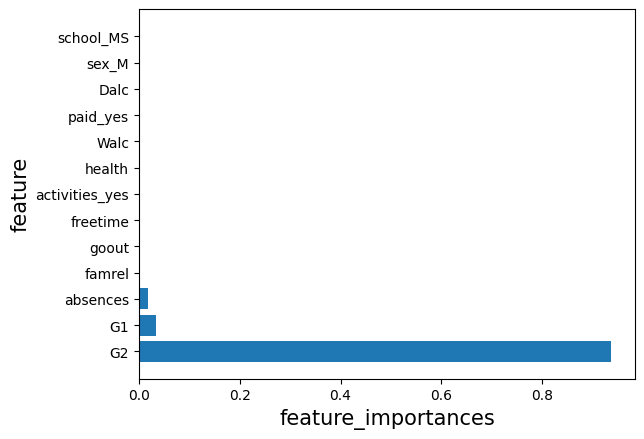

In [170]:
# 3) RandomForest
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor()
param_grid = {'max_depth' : [2,4,6,8,10], 'min_samples_split' : [2,4,6,8,10]}
model = GridSearchCV(rf, param_grid, cv = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print('train_score : ', model.score(X_train, y_train))
print('test_score : ', model.score(X_test, y_test))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

# best_hyperparameter
print('best_estimator_ : ', model.best_estimator_)
df_params = pd.DataFrame(model.cv_results_['params'])

df_params['mean_test_score'] = pd.DataFrame(model.cv_results_['mean_test_score'])
df_params.sort_values(by = ['mean_test_score'], ascending = False, inplace = True)
df_params.reset_index(drop = True, inplace = True)
print(df_params.head())


# feature_importance 확인
rf = RandomForestRegressor(max_depth  = df_params['max_depth'][0], min_samples_split = df_params['min_samples_split'][0])
rf.fit(X_train, y_train)
# np.mean([tree.feature_importances_ for tree in rf.estimators_], axis = 0) # 행방향으로 압축, 총 13개로 변수의 각각 평균으로 압축
feature_importances = pd.DataFrame(np.mean([tree.feature_importances_ 
                                            for tree in rf.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), feature_importances], axis = 1)
feature_importances.columns = ['var_name', 'var_value']
feature_importances = feature_importances.sort_values(['var_value']
                                                      , ascending = False).reset_index(drop = True)

import matplotlib.pyplot as plt
plt.barh(feature_importances['var_name'], feature_importances['var_value'], align = 'center')
plt.xlabel('feature_importances', size = 15)
plt.ylabel('feature', size = 15)
plt.show()

In [171]:
# SVM, XGBoost, RandomForest 모두 디테일하게 매개변수(하이퍼파라미터)를 찾아 적용시켰다.
# RMSE 기준으로 XGBoost가 0.67로 가장 낮다. 예측력이 좋기 때문에 가장 적합한 알고리즘으로 선택하였다.
# XGBoost 분석결과 G1, G2가 최종성적에 매우 영향을 끼치는 변수로 나오지만
# G1, G2는 grade와 상관성이 매우 높은 변수이기 때문에 이 둘을 제외하고는 absences가 가장 영향을 미치는 변수라고 볼 수있다.
# 현업에서는 변수 정확도만 보고 변수를 선택하는 것을 주의해야 한다.
# 각 모델의 주 변수로 G1, G2를 사용할 수 있지만, 성적이기 때문에 분석을 통해 성적에 영향을 미치는 변수를 찾기에는 어려워 보인다.
# 머신러닝은 어떠한 독립변수를 선택하느냐에 따라 결정되는 해석이 완전히 달라질 수 있따.
# 만약 학생의 성적에 영향을 미치는 변수를 찾고 싶다면 성적과 밀접한 관련이 있는 변수를 추가해야 한다.
# 그러면 모델의 정확성뿐만 아니라 의미있는 분석이 될 것이 될 것이라 생각한다. 